# DSA 5102 - Final Project

# Description
The goal of this assignment is to get you started on your final project. You should have (or should do so now)
identified a potential dataset to work on. Refer to project instructions with data resources if you have trouble
deciding on a dataset. Try to find something that’s interesting and unusual!
In a Jupyter notebook:
1. Introduce your dataset of choice and perform basic data visualization (you will improve upon these later in
your project)
2. Introduce an unsupervised learning problem statement (dimensionality reduction, clustering, etc) and apply
a method to solve the problem (PCA, autoencoders, K-means clustering, etc)
3. Discuss any interesting findings
Please use the markdown features of Jupyter to document your steps. You will receive feedback, which will help
you with your project. 
You are allowed to re-use content from this programming assignment in your final project

# Dataset
I find a dataset about student performance which try to predict student performance in secondary education (high school).

This data approach student achievement in secondary education of two Portuguese schools. It attributes include student grades, demographic, social and school related features and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por).The detailed description of the dataset is found [here](https://www.kaggle.com/datasets/whenamancodes/student-performance?topic=socialScienceDataset&page=2&select=Portuguese.csv)

Since that Mathematics group has 398 students' data and Portuguese language group has 652 students' data, I choose Portuguese language group as main research object.

Firstly, let me show the original dataset:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('Portuguese.csv')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


Let me explain some attributes that are difficult to understand.

Medu: mother's education ( 0 - none, 1 - primary education, 2 -  5th to 9th grade, 3 - secondary education or 4 -  higher education)

Fedu: father's education ( 0 - none, 1 - primary education, 2 -  5th to 9th grade, 3 - secondary education or 4 -  higher education)

schoolsup: extra educational support (yes or no)

paid: extra paid classes within the course subject (yes or no)

higher: wants to take higher education (yes or no)

romantic: with a romantic relationship (yes or no)

goout: going out with friends (from 1 - very low to 5 - very high)

Dalc: workday alcohol consumption (from 1 - very low to 5 - very high)

Walc: weekend alcohol consumption (from 1 - very low to 5 - very high)

In [2]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.00000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000
mean,16.745008,2.516129,2.308756,1.569892,1.930876,0.221198,3.930876,3.18126,3.187404,1.500768,2.276498,3.537634,3.654378,11.382488,11.569892,11.904762
std,1.217609,1.134481,1.100308,0.747889,0.828241,0.592449,0.954253,1.04999,1.174824,0.923830,1.284362,1.445326,4.635853,2.777315,2.909287,3.225880
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.00000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.00000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.00000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


## Visualization

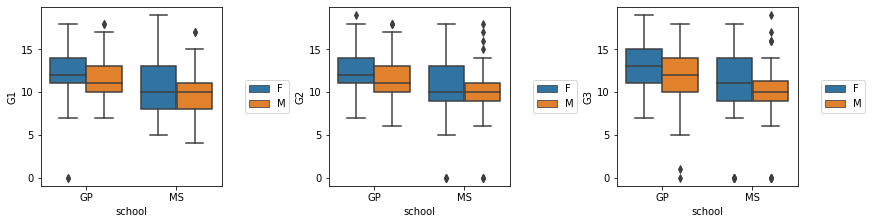

In [3]:
fig, ax =plt.subplots(1,3,constrained_layout=True, figsize=(12, 3))
axsub = sns.boxplot(x='school', y='G1', data=data, hue='sex',ax=ax[0])
axsub.legend(loc='center left', bbox_to_anchor=(1.1, 0.5), ncol=1)
axsub = sns.boxplot(x='school', y='G2', data=data, hue='sex',ax=ax[1])
axsub.legend(loc='center left', bbox_to_anchor=(1.1, 0.5), ncol=1)
axsub = sns.boxplot(x='school', y='G3', data=data, hue='sex',ax=ax[2])
axsub.legend(loc='center left', bbox_to_anchor=(1.1, 0.5), ncol=1)

G3 is the final year grade, while G1 and G2 correspond to the 1st and 2nd period grades. These three features could be seen as target attributes. It can be seen from the above figure that the grades of students in GP school are higher than those of MS school and the performance of girls is better than boys in the two schools.

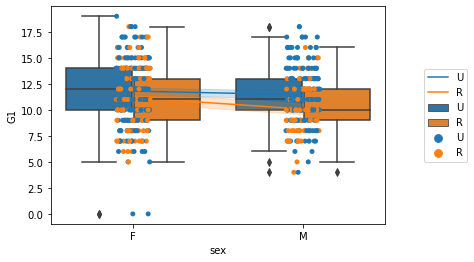

In [4]:
axsub = sns.boxplot(x='sex', y='G1', data=data, hue='address')
axessub = sns.stripplot(x='sex', y='G1', data=data, hue='address', ax=axsub)
axessub = sns.lineplot(x='sex', y='G1', data=data, hue='address', ax=axsub)
axsub.legend(loc='center left', bbox_to_anchor=(1.1, 0.5), ncol=1)

Whether male or female, the average score of students living in urban is better than those living in rural.

C:\Users\Wayne\AppData\Local\Temp/ipykernel_36472/197647129.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X=data['G1'][:, np.newaxis],
C:\Users\Wayne\AppData\Local\Temp/ipykernel_36472/197647129.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X=data['G2'][:, np.newaxis],
C:\Users\Wayne\AppData\Local\Temp/ipykernel_36472/197647129.py:13: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y1_pred = regressor1.predict(data['G1'][:, np.newaxis])
C:\Users\Wayne\AppData\Local\Temp/ipykernel_36472/197647129.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:,

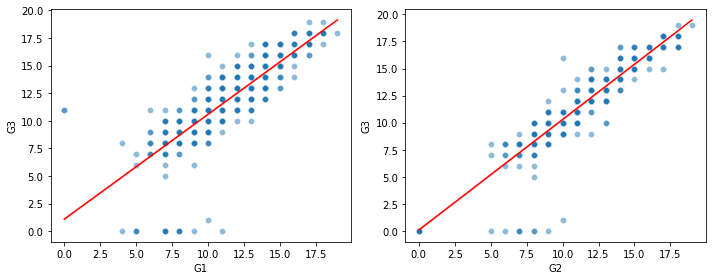

In [5]:
from sklearn.linear_model import LinearRegression
#Linear regression
regressor1 = LinearRegression()
regressor1.fit(
    X=data['G1'][:, np.newaxis],
    y=data['G3'],
)
regressor2 = LinearRegression()
regressor2.fit(
    X=data['G2'][:, np.newaxis],
    y=data['G3'],
)
y1_pred = regressor1.predict(data['G1'][:, np.newaxis])
y2_pred = regressor2.predict(data['G2'][:, np.newaxis])

fig, ax = plt.subplots(1, 2, figsize=(10, 4), sharex=True)
sns.scatterplot(
    x=data['G1'],
    y=data['G3'],
    ax=ax[0],
    alpha=0.5,
)
sns.lineplot(
    x=data['G1'],
    y=y1_pred,
    ax=ax[0],
    color='red',
)

sns.scatterplot(
    x=data['G2'],
    y=data['G3'],
    ax=ax[1],
    alpha=0.5,
)
sns.lineplot(
    x=data['G2'],
    y=y2_pred,
    ax=ax[1],
    color='red',
)


fig.tight_layout()

Generally speaking, the grades of the third semester are highly correlated with the first two semesters. Therefore, I try to use the linear regression method to predict G3 by using G1 and G2 respectively, and the fitting effect is good.

# Data preprocessing

After observing the data distribution, I delete some indicators which are not closely related to students’ performance（‘school’，‘reason’). The results of parents' jobs('Mjob', 'Fjob') are too diverse to discuss the impact on children’s academic performance, so I also delete these two indicators.

In [6]:
data=data.drop(['school','reason','Mjob','Fjob'],axis=1)

Then I change some string variables into numeric variables:

Sex: Female(0), Male(1)

Adress: Urban(0), Rural(1)

Family size: Less or equal to 3(0), Greater than 3(1)

Pstatus: Living together(0), Apart(1)

Guardian: Mother(0), Father(1), Other(2)

Extra educational support：No(0), Yes(1)

Family educational support:  No(0), Yes(1)

Extra paid classes: No(0), Yes(1)

Extra-curricular activities: No(0), Yes(1)

Attended nursery school: No(0), Yes(1)

Wants to take higher education: No(0), Yes(1)

Internet access at home: No(0), Yes(1)

With a romantic relationship: No(0), Yes(1)

In [7]:
data['sex']= data['sex'].replace({'F':0,'M':1})
data['address']= data['address'].replace({'U':0,'R':1})
data['famsize']= data['famsize'].replace({'LE3':0,'GT3':1})
data['Pstatus']= data['Pstatus'].replace({'T':0,'A':1})
data['guardian']= data['guardian'].replace({'mother':0,'father':1,'other':2})
data['schoolsup']= data['schoolsup'].replace({'no':0,'yes':1})
data['famsup']= data['famsup'].replace({'no':0,'yes':1})
data['paid']= data['paid'].replace({'no':0,'yes':1})
data['activities']= data['activities'].replace({'no':0,'yes':1})
data['nursery']= data['nursery'].replace({'no':0,'yes':1})
data['higher']= data['higher'].replace({'no':0,'yes':1})
data['internet']= data['internet'].replace({'no':0,'yes':1})
data['romantic']= data['romantic'].replace({'no':0,'yes':1})
data

,sex,age,address,famsize,Pstatus,Medu,Fedu,guardian,traveltime,studytime,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,18,0,1,1,4,4,0,2,2,...,4,3,4,1,1,3,4,0,11,11
1,0,17,0,1,0,1,1,1,1,2,...,5,3,3,1,1,3,2,9,11,11
2,0,15,0,0,0,1,1,0,1,2,...,4,3,2,2,3,3,6,12,13,12
3,0,15,0,1,0,4,2,0,1,3,...,3,2,2,1,1,5,0,14,14,14
4,0,16,0,1,0,3,3,1,1,2,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,0,18,0,1,0,1,1,0,2,2,...,1,1,1,1,1,5,6,11,12,9
647,1,17,0,0,0,3,1,0,2,1,...,2,4,5,3,4,2,6,10,10,10
648,1,18,1,0,0,3,2,0,3,1,...,4,4,1,3,4,5,4,10,11,11
649,0,18,0,1,1,4,4,0,2,2,...,4,3,4,1,1,3,4,0,11,11


# Unsupervised learning

## PCA

Since there are too many indicators in the dataset, and many indicators have obvious correlations (such as address and travel time), we first try the PCA method to extract the principal components and reduce the indicator dimensions.

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import minmax_scale
data1=data.drop(['G1','G2','G3'],axis=1)
#normalize the data
data_normalized = (data1 - data1.min()) / (data1.max() - data1.min())
pca = PCA()
pca.fit(data_normalized)

PCA()

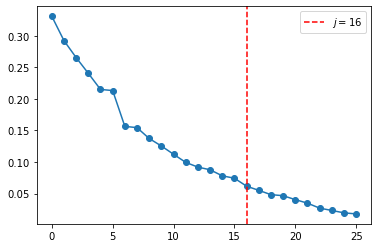

In [9]:
plt.plot(pca.explained_variance_, '-o')
plt.axvline(x=16, c='r', ls='--', label=r'$j=16$')
plt.legend()

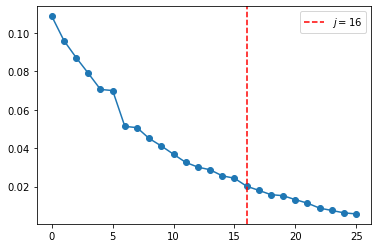

In [10]:
plt.plot(pca.explained_variance_ratio_, '-o')
plt.axvline(x=16, c='r', ls='--', label=r'$j=16$')
plt.legend()

After observation, the information of the original dataset can be represented by 16 principal components.Then we would show the specific composition of the first three principal components.

Text(0.5, 1.0, 'Third Principal Component Axis')

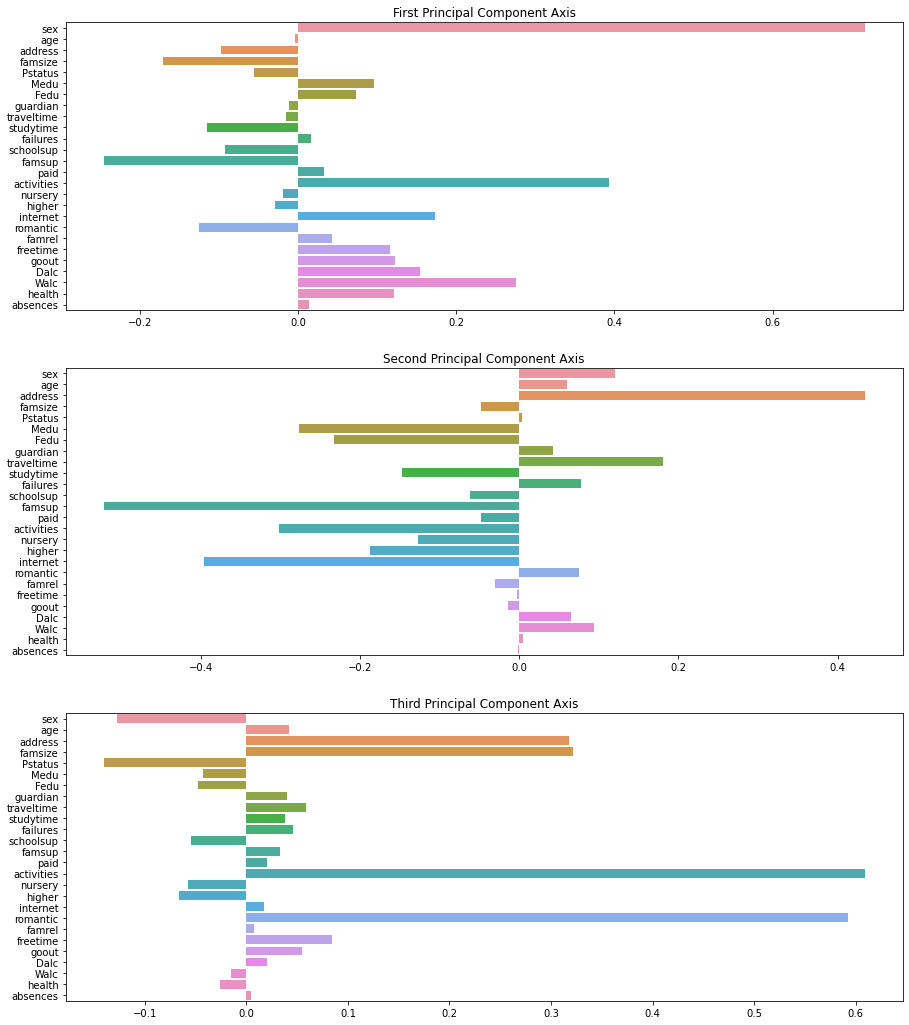

In [11]:
fig, ax = plt.subplots(3, 1, figsize=(15, 18))
sns.barplot(x=pca.components_[0], y=data1.columns, orient='h', ax=ax[0])
sns.barplot(x=pca.components_[1], y=data1.columns, orient='h', ax=ax[1])
sns.barplot(x=pca.components_[2], y=data1.columns, orient='h', ax=ax[2])

ax[0].set_title('First Principal Component Axis')
ax[1].set_title('Second Principal Component Axis')
ax[2].set_title('Third Principal Component Axis')

We can obtain a new dataset containing only 16 principal component indicators.

In [170]:
pca = PCA(n_components=16)
new_data=pca.fit_transform(data_normalized)
new_data

array([[-0.62181084,  0.22930779, -0.7038142 , ..., -0.33208742,
         0.1633263 , -0.13430706],
       [-0.6759018 , -0.17263091, -0.35171467, ..., -0.10965536,
         0.27336401,  0.13786966],
       [-0.22690448,  0.24415115, -0.86674651, ..., -0.21757194,
        -0.36420006, -0.12016723],
       ...,
       [ 0.76294307,  1.03152636, -0.55781434, ...,  0.10548201,
        -0.215676  , -0.08850572],
       [-0.62181084,  0.22930779, -0.7038142 , ..., -0.33208742,
         0.1633263 , -0.13430706],
       [-0.24536486, -0.25822221,  0.50889577, ..., -0.21881977,
         0.07176008,  0.11282312]])

## Correlation test

Next, we use the first principal component and the second principal component to test the correlation with G3 scores. From the results, we can roughly estimate the effect of using these principal components to predict G3.

SpearmanrResult(correlation=-0.07038456358011427, pvalue=0.07271490439488958)


<AxesSubplot:xlabel='0', ylabel='G3'>

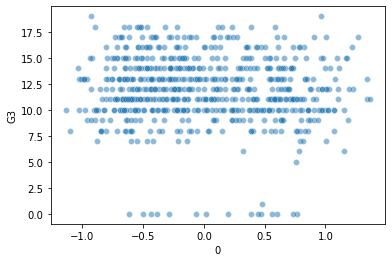

In [211]:
import scipy
#First principal component
new_data=pd.DataFrame(new_data)
first=new_data[0]
print(scipy.stats.spearmanr(first, data['G3']))
sns.scatterplot(
    x=first,
    y=data['G3'],
    alpha=0.5,
)

SpearmanrResult(correlation=-0.3353303727895229, pvalue=1.42625520996835e-18)


<AxesSubplot:xlabel='1', ylabel='G3'>

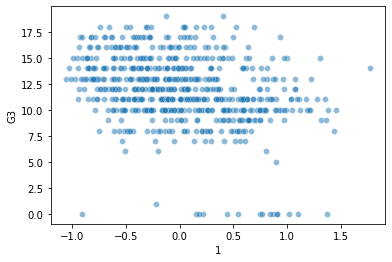

In [214]:
#Second principal component
second = new_data[1]
print(scipy.stats.spearmanr(second, data['G3']))
sns.scatterplot(
    x=second,
    y=data['G3'],
    alpha=0.5,
)

According to the scatter plot, the first and second principal components are not significantly linear with G3, so we calculate the spearman correlation coefficient. The correlation between the first principal component and G3 is not strong, while the second principal component shows a certain negative correlation with G3. The p value is very small, which passes the significance test.

## K-MEANS

Let us now apply the K-means algorithm to cluster the data, and try to find the basis for data classification and analyze the effect of data classification.

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Text(0, 0.5, 'Loss')

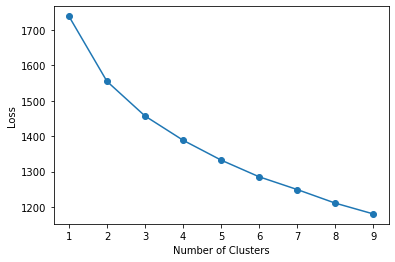

In [13]:
from sklearn.cluster import KMeans
losses = []
#Pca-data clustering
for K in range(1, 10):
    kmeans = KMeans(n_clusters=K)
    kmeans.fit(new_data)
    losses.append(kmeans.inertia_)
plt.plot(range(1,10), losses, '-o')
plt.xlabel('Number of Clusters')
plt.ylabel('Loss')

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Text(0, 0.5, 'Loss')

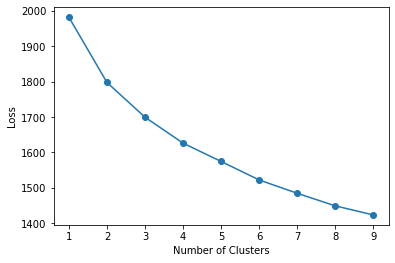

In [14]:
#original data clustering
losses = []
for K in range(1, 10):
    kmeans = KMeans(n_clusters=K)
    kmeans.fit(data_normalized)
    losses.append(kmeans.inertia_)
plt.plot(range(1,10), losses, '-o')
plt.xlabel('Number of Clusters')
plt.ylabel('Loss')

Dataset through the PCA method reduces the index dimension, the loss function value is smaller than the original dataset. Since there will be no great difference in students, we will only divide students into three categories.

In [15]:
#Pca-data
kmeans = KMeans(3)
kmeans.fit(new_data)
labels = kmeans.labels_
data['labels']=labels 
data.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,guardian,traveltime,studytime,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,labels
0,0,18,0,1,1,4,4,0,2,2,...,3,4,1,1,3,4,0,11,11,1
1,0,17,0,1,0,1,1,1,1,2,...,3,3,1,1,3,2,9,11,11,1
2,0,15,0,0,0,1,1,0,1,2,...,3,2,2,3,3,6,12,13,12,1
3,0,15,0,1,0,4,2,0,1,3,...,2,2,1,1,5,0,14,14,14,2
4,0,16,0,1,0,3,3,1,1,2,...,3,2,1,2,5,0,11,13,13,1


Record the class names of different students, and then calculate the average G3 scores of students in the different classes.

In [16]:
data['G3'].groupby([data['labels']]).mean()

labels
0    11.406015
1    12.142202
2    12.389222
Name: G3, dtype: float64

The average G3 scores of all students are 11.9048, while the average G3 scores of the three categories are 11.0529, 11.8282, and 12.5720 (that is, below the average, close to the average, and above the average). Therefore, it can be explained that these indicators can better predict students' G3 scores. Next, we try to use the same method on the original dataset and observe the classification effect.

In [17]:
#original data
kmeans = KMeans(3)
kmeans.fit(data_normalized)
labels = kmeans.labels_
data['labels']=labels 
data['G3'].groupby([data['labels']]).mean()

labels
0    12.159091
1    11.386364
2    12.389222
Name: G3, dtype: float64

Directly using the original data for k-mean clustering, the average G3 scores of the three types of students are 11.4000, 12.3892, 12.1461. The classification effect is obviously worse the method of extracting principal components first and then clustering.

## Conclusion

After the above analysis, the PCA method can well extract the information in the original data, and reduce the data complexity and noise. The K-MEANS method can classify data through the correlation of indicators, and the classification results are also consistent with the actual situation.

# Supervised learning

In supervised learning part, we mainly use various methods to predict G3 by the principal components extracted from PCA, so this is a clear regression problem.

In [290]:
#Split training set test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(new_data, data['G3'], test_size=0.1)

## Linear Regression with Polynomial Kernel

First, we try to use Linear Regression with Polynomial Kernel(degree 3). At the same time, we use 10 fold cross validation method to evaluate the fitting accuracy of the model. Because this problem is a regression problem, we adopt MSE as the loss value of model prediction.

In [296]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
# Linear regression with polynomial kernel(degree 3)
phi = PolynomialFeatures(degree=3)
x_poly_train= phi.fit_transform(x_train)
x_poly_test= phi.fit_transform(x_test)
regressor_poly = LinearRegression()
regressor_poly.fit(
    X=x_poly_train,
    y=y_train,
)
scores = cross_val_score(regressor_poly, x_poly_train, y_train, cv=10,scoring='neg_mean_squared_error')
print(scores)
print(f'Mean MSE: {np.mean(scores)}')
print(f'Std MSE: {np.std(scores)}')

[-259.41328989  -81.80194993 -161.27502029 -198.20881438 -225.56074126
 -148.65838179  -96.78558501 -185.97117698 -108.06598299 -228.7603996 ]
Mean MSE: -169.45013421237536
Std MSE: 57.52301114919624


After ten times of model fitting, the mean MSE of linear regression with polynomial kernel(degree 3) is 169.45, and the Standard Deviation is 57.52. Then, we would print the score in train set and test set.

In [292]:
#Score
print(f'Train score: {regressor_poly.score(x_poly_train, y_train)}')
print(f'Test score: {regressor_poly.score(x_poly_test, y_test)}')

Train score: 1.0
Test score: -19.924944097391116


The train set score is 1, and the test set score is -19. The model appears obvious over fitting phenomenon, so we try to add a regular penalty term, that is, Kernel Ridge Regression.

## Kernel Ridge Regression

[ -8.98433482  -8.23610945  -7.58825057  -6.76989569 -10.41456645
 -11.03165932  -7.26264922  -5.77120201  -9.02249758 -12.14642021]
Mean MSE: -8.722758532167346
Std MSE: 1.9040529365959957
Train score: 0.6007697584498146
Test score: 0.3439040767649224


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

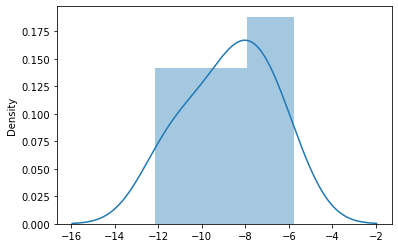

In [298]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=10)
ridge.fit(x_poly_train, y_train)
scores = cross_val_score(ridge, x_poly_train, y_train, cv=10,scoring='neg_mean_squared_error')
print(scores)
print(f'Mean MSE: {np.mean(scores)}')
print(f'Std MSE: {np.std(scores)}')
print(f'Train score: {ridge.score(x_poly_train, y_train)}')
print(f'Test score: {ridge.score(x_poly_test, y_test)}')
sns.distplot(scores)

Kernel Ridge Regression fitting effect is obviously stronger(mean MSE: 8.72, Standard Deviation: 1.90). Train score is 0.60 and test score is 0.34. Then, we try to use decision tree method to solve this regression problem.

## Decision Tree

In [294]:
from sklearn.tree import DecisionTreeRegressor
#DecisionTreeRegressor。
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)
scores = cross_val_score(dtr, x_train, y_train, cv=10,scoring='neg_mean_squared_error')
print(scores)
print(f'Mean MSE: {np.mean(scores)}')
print(f'Train score: {dtr.score(x_train, y_train)}')
print(f'Test MSE: {dtr.score(x_test, y_test)}')

[-13.05084746 -15.69491525 -14.05084746 -15.44067797 -19.93220339
 -13.98275862 -13.74137931 -15.86206897 -15.05172414 -14.93103448]
Mean MSE: -15.173845704266515
Train score: 1.0
Test MSE: -0.15120838383118262


As just now, the simple regression tree model is severely over fitted, so we try to use Gradient Boosting Decison Tree mothod. GBDT method accumulates the conclusions of all trees to make the final conclusion. The core of GBDT is that each tree learns the residual of the sum of all previous trees' conclusions. This residual is the sum of the real value after adding the predicted value.

## GBDT Method

In [295]:
# GBDT mothod
from sklearn.ensemble import GradientBoostingRegressor
GBDT = GradientBoostingRegressor()
GBDT.fit(x_train,y_train)
scores = cross_val_score(GBDT, x_train, y_train, cv=10,scoring='neg_mean_squared_error')
print(scores)
print(f'Mean MSE: {np.mean(scores)}')
print(f'Train score: {GBDT.score(x_train, y_train)}')
print(f'Test score: {GBDT.score(x_test, y_test)}')

[ -9.28610294  -9.62954855  -7.81181582  -7.84538129 -10.90117797
 -11.42186113  -8.27517689  -7.13927389 -11.51080751 -15.42491924]
Mean MSE: -9.924606524357015
Train score: 0.7589155734514696
Test score: 0.26663332294399544


The prediction effect of the GBDT model is good, mean MSE: 9.92, train score: 0.76, test score: 0.27.

## Conclusion

We have tried four supervised learning methods to predict performance by principal components. In the whole prediction process, the common problem is over fitting. By observing our original data, we can find that many indicators are binary indicators and have many data dimensions, which belongs to high-dimensional sparse features. Therefore, it is difficult for us to divide the feature space effectively, and data are very sensitive to noise. After several improvements, the over fitting phenomenon has been alleviated, results display that Kernel Ridge Regression and GBDT mothod have good prediction effects.

Observing the model fitting scores, we notice that the model fitting score in test data is not high. Combining the previous correlation test result, we find that it is difficult to accurately predict the student's grade simply by the indicators of the original data. This is also consistent with the reality. The students' test scores are indeed related to their performance in school, family conditions, study time and other factors, but they are not the decisive factors for achieving good grades. There are also factors that are difficult to measure, such as students' talents and personality. Therefore, we can only say that this project is a meaningful attempt.